## **Random Forest Classification**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

<img src="https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png">

**Let's understand it in the laymen's terms.**

Andrew wants to decide where to go during one-year vacation, so he asks the people who know him best for suggestions. The first friend he seeks out asks him about the likes and dislikes of his past travels. Based on the answers, he will give Andrew some advice.

This is a typical decision tree algorithm approach. Andrew's friend created rules to guide his decision about what he should recommend, by using Andrew's answers. 

Afterwards, Andrew starts asking more and more of his friends to advise him and they again ask him different questions they can use to derive some recommendations from. Finally, Andrew chooses the places that where recommend the most to him, which is the typical random forest algorithm approach.

## **Difference between Decision Trees & Random Forests**

While random forest is a collection of decision trees, there are some differences.

If you input a training dataset with features and labels into a decision tree, it will formulate some set of rules, which will be used to make the predictions.

For example, to predict whether a person will click on an online advertisement, you might collect the ads the person clicked on in the past and some features that describe his/her decision. If you put the features and labels into a decision tree, it will generate some rules that help predict whether the advertisement will be clicked or not. In comparison, the random forest algorithm randomly selects observations and features to build several decision trees and then averages the results.

Another difference is "deep" decision trees might suffer from overfitting. Most of the time, random forest prevents this by creating random subsets of the features and building smaller trees using those subsets.

Afterwards, it combines the subtrees. It's important to note this doesn’t work every time and it also makes the computation slower, depending on how many trees the random forest builds.

<img src = "https://miro.medium.com/max/3200/0*YEwFetXQGPB8aDFV">

## **How does the algorithm work?**

It works in four steps:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg">

## **Geting Started with Random Forest Classification**

In [85]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold

## **Loading Dataset**

Read .csv data into a Dataframe

In [63]:
mushrooms = pd.read_csv("/content/drive/My Drive/Datasets/mushrooms.csv")

mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [64]:
#Exploring Shape of Dataset (Rows x Cols)
mushrooms.shape

(8124, 23)

In [65]:
#Finding any Missing Values
mushrooms.isna().sum(axis = 0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [66]:
#Let's find the unique values in al columns

for i in mushrooms.columns:
    print(f'{i} -> \t{mushrooms[i].unique()}')

class -> 	['p' 'e']
cap-shape -> 	['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 	['s' 'y' 'f' 'g']
cap-color -> 	['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 	['t' 'f']
odor -> 	['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 	['f' 'a']
gill-spacing -> 	['c' 'w']
gill-size -> 	['n' 'b']
gill-color -> 	['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> 	['e' 't']
stalk-root -> 	['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> 	['s' 'f' 'k' 'y']
stalk-surface-below-ring -> 	['s' 'f' 'y' 'k']
stalk-color-above-ring -> 	['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> 	['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> 	['p']
veil-color -> 	['w' 'n' 'o' 'y']
ring-number -> 	['o' 't' 'n']
ring-type -> 	['p' 'e' 'l' 'f' 'n']
spore-print-color -> 	['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> 	['s' 'n' 'a' 'v' 'y' 'c']
habitat -> 	['u' 'g' 'm' 'd' 'p' 'w' 'l']


## **Exploratory Data Analysis**

***To visualize the number of mushrooms for each cap color categorize. We will build a bar chart***

In [67]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = mushrooms['cap-color'].value_counts()
cap_colors

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [68]:
m_height = cap_colors.values.tolist() #Provides numerical values
m_height

[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]

In [69]:
cap_colors.axes #Provides row labels

[Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'r', 'u'], dtype='object')]

In [70]:
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list
cap_color_labels

['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'r', 'u']

**Some Advance Data Visualization**

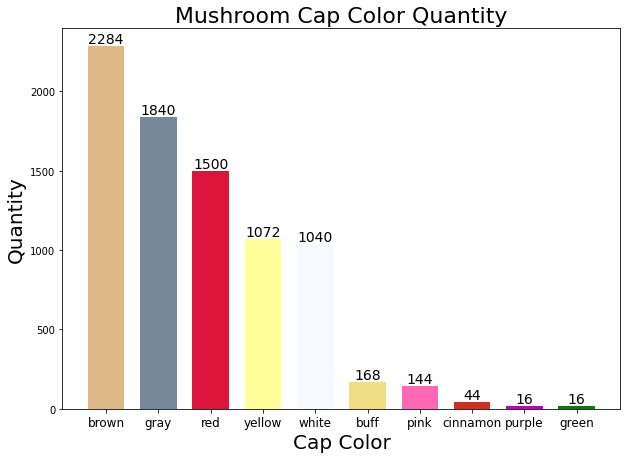

In [71]:
#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

***Following bar chart shows the # of mushrooms which are edible or poisonous based on cap-color***

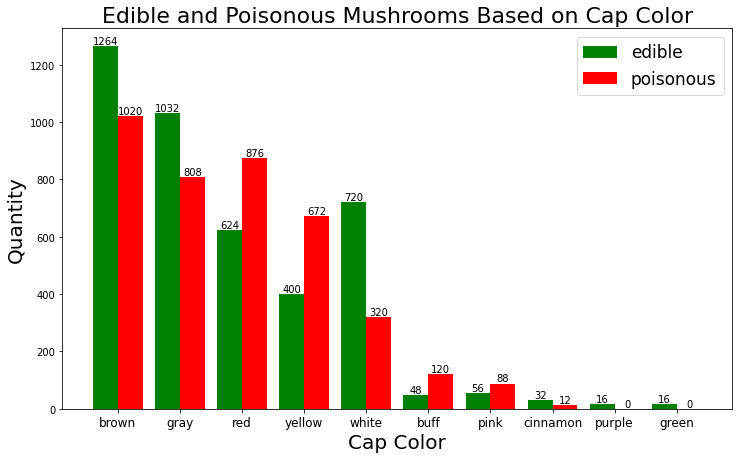

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [72]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color= 'g')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='r')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

**Let's get back to our Machine Learning Pipleine**

## **Preprocessing**

### **Label Encoding**

In [73]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column]=labelencoder.fit_transform(mushrooms[column])
    
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [74]:
#Once again checking missing values
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Remember: Our target is 'class' column**

In [76]:
mushrooms.groupby('class').size()

class
0    4208
1    3916
dtype: int64

## **Features Extraction**

Extracting features and splitting data into test and train.

In [56]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import mutual_info_classif

In [77]:
X = mushrooms
X = X.drop(columns=['class'])
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [78]:
y = mushrooms[['class']]
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


## **Preprocessing: Standard Scaling**
Machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed so we will standad the data using StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler
stand_x=StandardScaler()
X=stand_x.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66dd69c470>,
      dtype=object)

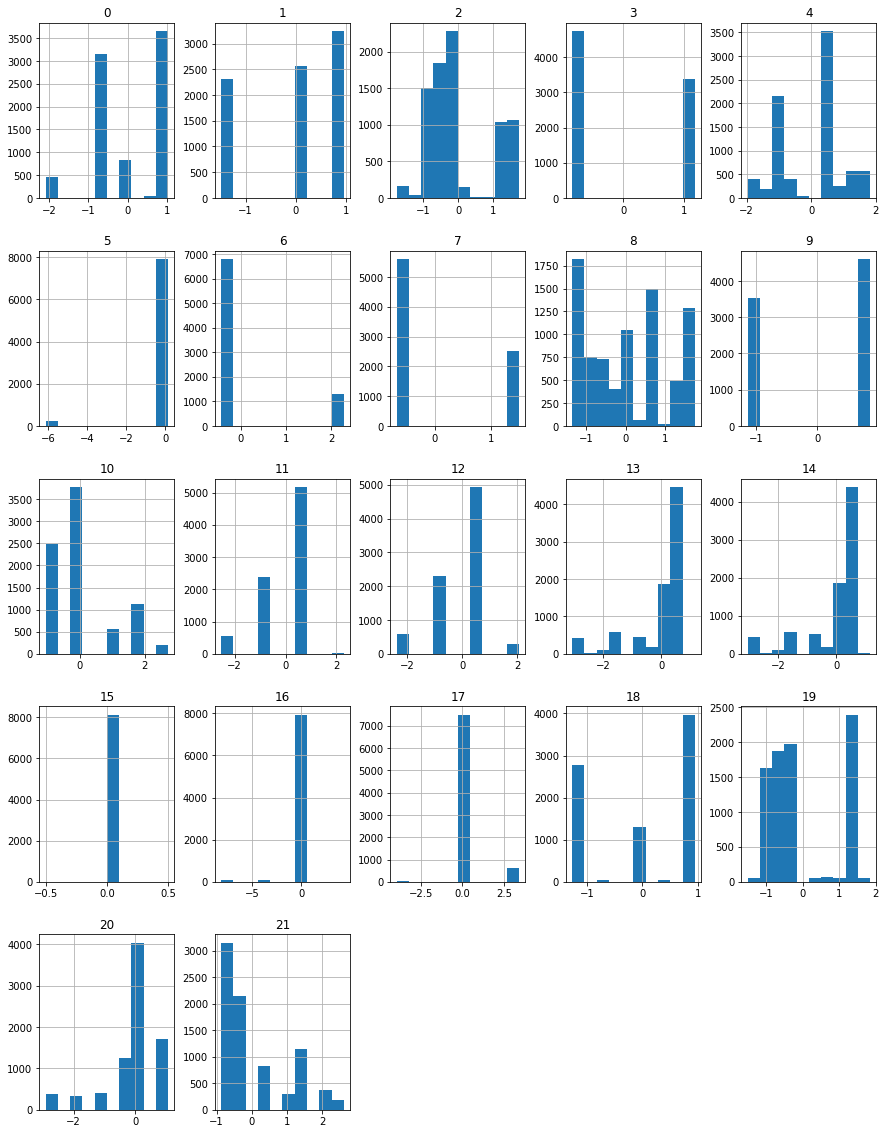

In [82]:
#Let's Visualize Histograms ;-D

fig = plt.figure(figsize = (15,20))
# If the current axes doesn't exist, or isn't a polar one, 
# the appropriate axes will be created and then returned.
ax = fig.gca() 
pd.DataFrame(X).hist(ax = ax)

## **Spliting our Dataset into Train & Test Set**

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

## **Finding an Optimal Value**



In [89]:
param_grid = {
    'max_depth': [1,5,10,15],
    'n_estimators' : [10,100,500,1000],
    'min_samples_leaf' : [1,2,3,4,5,10,15,20,30,40,50]
    }

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,max_features = 'sqrt'), param_grid=param_grid,cv=10)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

optimal_estimators = grid_search.best_params_.get("n_estimators")
optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


## **Training the Model**

We are using Decision Tree Classification model as imported from sklearn.tree library and then it's being trained on features and target variables

In [103]:
model = RandomForestClassifier(n_estimators=optimal_estimators, max_depth = optimal_depth,min_samples_leaf = optimal_leaf)
k_fold = KFold(n_splits=10,random_state=123)
model.fit(x_train,y_train)

predictions = cross_val_predict(model,x_test,y_test,cv=k_fold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed 

## **Evaluation**

In [104]:
# Model Accuracy, how often is the classifier correct?

print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[820   0]
 [  0 805]]
1.0


## **Visualizing Random Forests**



In [105]:
#Fore features names.
features = mushrooms.drop(columns=['class'])
feature_cols = features.columns

In [106]:
feature_cols

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [107]:
feature_cols = feature_cols.tolist()

In [108]:
feature_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

[Text(366.1875, 518.8909090909091, 'X[8] <= -0.37\ngini = 0.5\nsamples = 4085\nvalue = [3352, 3147]'),
 Text(179.35714285714286, 469.4727272727273, 'X[10] <= 0.368\ngini = 0.28\nsamples = 1677\nvalue = [445, 2201]'),
 Text(149.46428571428572, 420.05454545454546, 'X[18] <= 0.393\ngini = 0.14\nsamples = 1503\nvalue = [180, 2201]'),
 Text(89.67857142857143, 370.6363636363636, 'X[21] <= 2.03\ngini = 0.082\nsamples = 1368\nvalue = [93, 2066]'),
 Text(59.785714285714285, 321.21818181818185, 'X[13] <= 0.36\ngini = 0.009\nsamples = 1315\nvalue = [9, 2066]'),
 Text(29.892857142857142, 271.8, 'gini = 0.0\nsamples = 860\nvalue = [0, 1365]'),
 Text(89.67857142857143, 271.8, 'X[18] <= -0.995\ngini = 0.025\nsamples = 455\nvalue = [9, 701]'),
 Text(59.785714285714285, 222.38181818181818, 'gini = 0.0\nsamples = 449\nvalue = [0, 701]'),
 Text(119.57142857142857, 222.38181818181818, 'gini = 0.0\nsamples = 6\nvalue = [9, 0]'),
 Text(119.57142857142857, 321.21818181818185, 'gini = 0.0\nsamples = 53\nvalue

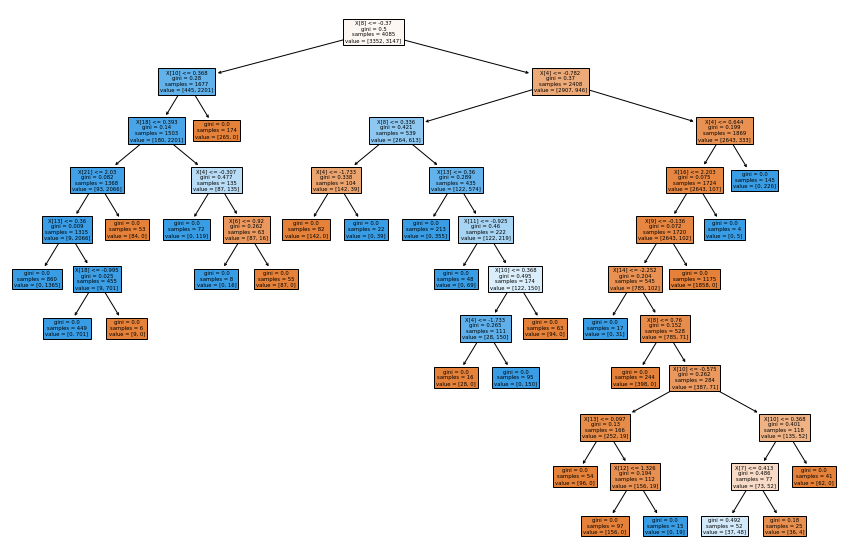

In [112]:
#For visualizing one tree for sample in random Forest
import sklearn.tree as tree 
plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[0],filled=True)

In [ ]:
# For visualizing all trees in random Forest
for i in range(0,len(model.estimators_)):
